In [3]:
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('store.csv')

In [4]:
data.head()   ######info about data


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,1012,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member
1,61,2010-09-20 11:41:22,2010-09-20 11:42:23,31209,1st & N St SE,31209,1st & N St SE,W00032,Member
2,2690,2010-09-20 12:05:37,2010-09-20 12:50:27,31600,5th & K St NW,31100,19th St & Pennsylvania Ave NW,W00993,Member
3,1406,2010-09-20 12:06:05,2010-09-20 12:29:32,31600,5th & K St NW,31602,Park Rd & Holmead Pl NW,W00344,Member
4,1413,2010-09-20 12:10:43,2010-09-20 12:34:17,31100,19th St & Pennsylvania Ave NW,31201,15th & P St NW,W00883,Member


In [5]:
data.info()    ###### info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115597 entries, 0 to 115596
Data columns (total 9 columns):
Duration                115597 non-null int64
Start date              115597 non-null object
End date                115597 non-null object
Start station number    115597 non-null int64
Start station           115597 non-null object
End station number      115597 non-null int64
End station             115597 non-null object
Bike number             115597 non-null object
Member type             115597 non-null object
dtypes: int64(3), object(6)
memory usage: 7.9+ MB


In [6]:
data.dtypes   ##### info about types

Duration                 int64
Start date              object
End date                object
Start station number     int64
Start station           object
End station number       int64
End station             object
Bike number             object
Member type             object
dtype: object

In [7]:
data.describe()  #### statistics

,Duration,Start station number,End station number
count,115597.000000,115597.000000,115597.000000
mean,1254.649956,31266.213431,31268.042250
std,2914.317998,187.645048,186.194316
min,60.000000,31000.000000,31000.000000
25%,403.000000,31110.000000,31111.000000
50%,665.000000,31213.000000,31214.000000
75%,1120.000000,31301.000000,31238.000000
max,85644.000000,31805.000000,31805.000000


In [8]:
#Drop unnecessary columns
data=data.drop('Start date',axis=1)
data=data.drop('End date',axis=1)
data=data.drop('Start station',axis=1)
data=data.drop('End station',axis=1)

In [9]:
data.head() 

,Duration,Start station number,End station number,Bike number,Member type
0,1012,31208,31108,W00742,Member
1,61,31209,31209,W00032,Member
2,2690,31600,31100,W00993,Member
3,1406,31600,31602,W00344,Member
4,1413,31100,31201,W00883,Member


In [10]:
########### label encoder :- COnverts Data(Strings) into numbers for using it for calculations 
le = LabelEncoder()
le.fit(data['Member type'])
data['Member type'] = le.transform(data['Member type'])

In [11]:
data.head()

,Duration,Start station number,End station number,Bike number,Member type
0,1012,31208,31108,W00742,1
1,61,31209,31209,W00032,1
2,2690,31600,31100,W00993,1
3,1406,31600,31602,W00344,1
4,1413,31100,31201,W00883,1


In [12]:
le = LabelEncoder()
le.fit(data['Bike number'])
data['Bike number'] = le.transform(data['Bike number'])

In [13]:
data.head()

,Duration,Start station number,End station number,Bike number,Member type
0,1012,31208,31108,614,1
1,61,31209,31209,41,1
2,2690,31600,31100,836,1
3,1406,31600,31602,282,1
4,1413,31100,31201,734,1


In [14]:
data.shape     ###### data.size

(115597, 5)

In [15]:
#train=np.array(data.iloc[0:85000])   ### spitting into training and tetsign
#test=np.array(data.iloc[85000:,])


train,test=train_test_split(data,test_size=0.20,random_state=0)

In [16]:
train.shape,test.shape       ########  train and test

((92477, 5), (23120, 5))

In [17]:
#separate labels from other features
train_labels=train["Member type"].copy();
train=train.drop("Member type", axis=1)

test_labels=test["Member type"].copy()
test=test.drop("Member type",axis=1)

In [18]:
from sklearn.naive_bayes import GaussianNB   ##### guassinan
model=GaussianNB()

In [19]:
model.fit(train,train_labels)
predicted=model.predict(test)


In [20]:
predicted.shape

(23120,)

In [21]:
predicted

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
count=0                 ### accuracy
for l in range(len(predicted)):  
    if(predicted[l]==test_labels.iloc[l]):
        count=count+1



In [23]:
count

19338

In [25]:
print(count/(len(predicted)))

0.8364186851211073


In [26]:
from sklearn import svm
from sklearn import tree
from sklearn.metrics import accuracy_score

In [42]:
clas=tree.DecisionTreeClassifier();
clas.fit(train,train_labels)
pred=clas.predict(test)
accu=accuracy_score(test_labels,pred)
accu

0.7894896193771627

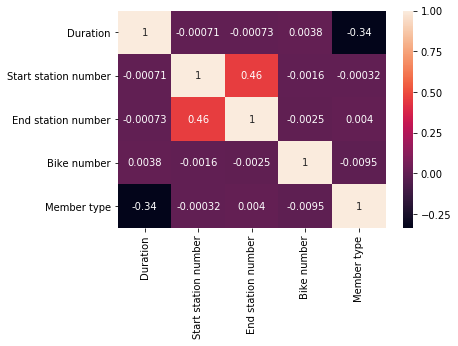

In [47]:
corr=data.corr();
sns.heatmap(corr,annot=True)